In [1]:
from rapa import rapa
import random
from sklearn.utils import check_array
import pandas as pd
import numpy as np
import datarobot as dr
from datarobot.errors import ClientError
from statistics import mean
import pickle
import matplotlib.pyplot as plt
import seaborn as sb
from collections import OrderedDict, defaultdict

In [2]:
# Initializes the api
rapa.utils.initialize_dr_api('Jared', 'data/datarobot-tokens.p')

DataRobot API initiated with endpoint 'https://app.datarobot.com/api/v2'


In [5]:
# Creates a rapa classifcation object
depression_classification = rapa.RAPAClassif()

---

In [5]:
data = pd.read_pickle('data/depression_data.pkl')

In [6]:
print(data.shape)
data

(537, 424959)


,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,ch.9.93373462R,ch.9.93402636R,ch.9.941347R,ch.9.96055087R,ch.9.98463211R,ch.9.98936572R,ch.9.98937537R,ch.9.98957343R,ch.9.98989607R,diagnosis
sample1,0.326818,0.879197,0.468160,0.146588,0.448943,0.502265,0.873614,0.311076,0.475424,0.018955,...,0.016097,0.058038,0.074234,0.197355,0.027904,0.129527,0.029709,0.044150,0.206440,case
sample10,0.415210,0.907214,0.557319,0.233235,0.736620,0.460241,0.824549,0.147720,0.336983,0.016009,...,0.020897,0.029848,0.037481,0.203643,0.038363,0.080692,0.021716,0.032436,0.050670,case
sample100,0.765856,0.844815,0.441327,0.246168,0.678574,0.523411,0.797574,0.358016,0.337046,0.011921,...,0.020495,0.054040,0.065623,0.217844,0.037159,0.104665,0.036617,0.039345,0.088958,case
sample101,0.325327,0.900210,0.550631,0.123783,0.694306,0.447073,0.745615,0.172808,0.336132,0.014005,...,0.015561,0.024096,0.044807,0.144187,0.033617,0.080591,0.017461,0.040946,0.048543,case
sample102,0.535994,0.900743,0.705987,0.160707,0.728889,0.547176,0.845196,0.227794,0.291751,0.012642,...,0.017191,0.025321,0.041597,0.189545,0.027423,0.078994,0.014146,0.035943,0.018085,case
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,0.275550,0.877312,0.407336,0.170893,0.630106,0.528106,0.798682,0.267563,0.328711,0.014422,...,0.015237,0.026469,0.041492,0.148412,0.023314,0.074945,0.021427,0.050690,0.063773,case
sample96,0.562624,0.928289,0.534156,0.379423,0.746397,0.466041,0.923677,0.254389,0.315041,0.012923,...,0.030747,0.044278,0.061436,0.165648,0.026609,0.129990,0.027128,0.033429,0.053650,case
sample97,0.334430,0.919974,0.455863,0.227999,0.757457,0.416645,0.892115,0.103597,0.260937,0.014367,...,0.033691,0.022881,0.065998,0.228023,0.032720,0.082839,0.023797,0.037344,0.074852,case
sample98,0.314251,0.923391,0.732124,0.226347,0.694329,0.381738,0.838182,0.317821,0.374928,0.011575,...,0.017748,0.031515,0.046607,0.166580,0.029593,0.100754,0.024117,0.026919,0.046213,case


In [7]:
sub_df = depression_classification.create_submittable_dataframe(data,
                                                                target_name='diagnosis',
                                                                n_features=1000)

In [8]:
print(sub_df.shape)
sub_df

(537, 1002)


,diagnosis,partition,cg14085262,cg01710147,cg20672744,cg16187883,cg26624576,cg02622647,cg06876053,cg17842918,...,cg05255351,cg15526035,cg25539505,cg00622166,cg12926720,cg09416908,cg25595641,cg22488352,cg04477101,cg15745106
sample1,case,CV Fold 1,0.179250,0.270365,0.019321,0.155986,0.053665,0.559145,0.130336,0.086743,...,0.089194,0.057778,0.475283,0.442216,0.064338,0.296102,0.972149,0.639367,0.916147,0.114010
sample10,case,CV Fold 4,0.281646,0.349292,0.016047,0.151707,0.037878,0.708679,0.192954,0.436787,...,0.206151,0.154202,0.433014,0.466354,0.122489,0.550499,0.952105,0.636096,0.918016,0.091768
sample100,case,CV Fold 1,0.176892,0.282296,0.014888,0.077303,0.030675,0.054581,0.403917,0.409019,...,0.152386,0.029710,0.540074,0.463393,0.111203,0.354570,0.971410,0.514323,0.925078,0.067699
sample101,case,CV Fold 1,0.078170,0.274674,0.017236,0.123574,0.028556,0.678484,0.102180,0.257742,...,0.079557,0.032645,0.395259,0.326900,0.159389,0.271085,0.958769,0.532779,0.923637,0.043584
sample102,case,CV Fold 2,0.138843,0.332160,0.013280,0.107642,0.033990,0.843312,0.267478,0.368920,...,0.232494,0.062960,0.594140,0.336749,0.062465,0.392574,0.974464,0.643655,0.921392,0.046521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,case,CV Fold 3,0.083089,0.121209,0.014724,0.144705,0.020783,0.138557,0.126823,0.144314,...,0.144036,0.044600,0.550834,0.315057,0.042873,0.269496,0.976837,0.470063,0.799468,0.050022
sample96,case,CV Fold 2,0.121169,0.287285,0.013554,0.141194,0.021470,0.075167,0.445984,0.069115,...,0.258348,0.075233,0.315088,0.402653,0.114597,0.390054,0.959483,0.350021,0.925219,0.081079
sample97,case,CV Fold 4,0.036372,0.294898,0.018808,0.103721,0.044162,0.869265,0.107096,0.150178,...,0.051838,0.020446,0.327249,0.231370,0.081691,0.229011,0.917899,0.643944,0.924606,0.085240
sample98,case,CV Fold 1,0.073013,0.132169,0.013815,0.140281,0.040967,0.683278,0.091584,0.329488,...,0.069400,0.049465,0.355237,0.268055,0.099456,0.168172,0.976301,0.670413,0.914698,0.056300


In [9]:
"""project = depression_classification.submit_datarobot_project(sub_df, 'diagnosis', 'tutorial_depression')"""

In [3]:
project = rapa.utils.find_project("tutorial_depression")

---------- Informative Features (1000) ----------
Informative Features: Waiting for previous jobs to complete...
Informative Features: Waiting for feature impact...
Feature Impact: (12.78s)
Graphing feature performance...


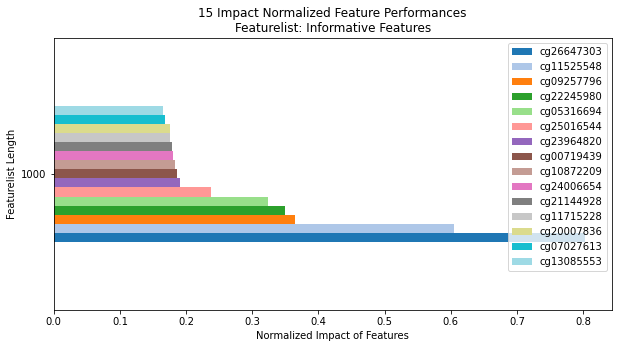

Project: tutorial_depression | Featurelist Prefix: TEST_0.1 | Feature Range: [750, 500, 250, 100, 50, 25, 10, 5]
Feature Importance Metric: median | Model Performance Metric: AUC


  0%|          | 0/8 [00:00<?, ?it/s]

---------- TEST_0.1 (750) ----------
\

KeyboardInterrupt: 

In [9]:
depression_classification.perform_parsimony(project=project, 
                                            featurelist_prefix='TEST_0.1', 
                                            starting_featurelist_name='Informative Features', 
                                            feature_range=[750, 500, 250, 100, 50, 25, 10, 5], 
                                            #lives=2, 
                                            #cv_average_mean_error_limit=.8, 
                                            to_graph=['feature_performance', 'models'])

In [10]:
data = pd.read_pickle('data/depression_data.pkl')
data

,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,ch.9.93373462R,ch.9.93402636R,ch.9.941347R,ch.9.96055087R,ch.9.98463211R,ch.9.98936572R,ch.9.98937537R,ch.9.98957343R,ch.9.98989607R,diagnosis
sample1,0.326818,0.879197,0.468160,0.146588,0.448943,0.502265,0.873614,0.311076,0.475424,0.018955,...,0.016097,0.058038,0.074234,0.197355,0.027904,0.129527,0.029709,0.044150,0.206440,case
sample10,0.415210,0.907214,0.557319,0.233235,0.736620,0.460241,0.824549,0.147720,0.336983,0.016009,...,0.020897,0.029848,0.037481,0.203643,0.038363,0.080692,0.021716,0.032436,0.050670,case
sample100,0.765856,0.844815,0.441327,0.246168,0.678574,0.523411,0.797574,0.358016,0.337046,0.011921,...,0.020495,0.054040,0.065623,0.217844,0.037159,0.104665,0.036617,0.039345,0.088958,case
sample101,0.325327,0.900210,0.550631,0.123783,0.694306,0.447073,0.745615,0.172808,0.336132,0.014005,...,0.015561,0.024096,0.044807,0.144187,0.033617,0.080591,0.017461,0.040946,0.048543,case
sample102,0.535994,0.900743,0.705987,0.160707,0.728889,0.547176,0.845196,0.227794,0.291751,0.012642,...,0.017191,0.025321,0.041597,0.189545,0.027423,0.078994,0.014146,0.035943,0.018085,case
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,0.275550,0.877312,0.407336,0.170893,0.630106,0.528106,0.798682,0.267563,0.328711,0.014422,...,0.015237,0.026469,0.041492,0.148412,0.023314,0.074945,0.021427,0.050690,0.063773,case
sample96,0.562624,0.928289,0.534156,0.379423,0.746397,0.466041,0.923677,0.254389,0.315041,0.012923,...,0.030747,0.044278,0.061436,0.165648,0.026609,0.129990,0.027128,0.033429,0.053650,case
sample97,0.334430,0.919974,0.455863,0.227999,0.757457,0.416645,0.892115,0.103597,0.260937,0.014367,...,0.033691,0.022881,0.065998,0.228023,0.032720,0.082839,0.023797,0.037344,0.074852,case
sample98,0.314251,0.923391,0.732124,0.226347,0.694329,0.381738,0.838182,0.317821,0.374928,0.011575,...,0.017748,0.031515,0.046607,0.166580,0.029593,0.100754,0.024117,0.026919,0.046213,case


In [29]:
data_small = data.iloc[:,0:100]
data_small = data_small.T.append(data.iloc[:,-1]).T
data_small.iat[0, 0] = np.NaN
data_small

,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,cg00004067,cg00004072,cg00004082,cg00004089,cg00004105,cg00004207,cg00004219,cg00004257,cg00004421,diagnosis
sample1,NaN,0.879197,0.46816,0.146588,0.448943,0.502265,0.873614,0.311076,0.475424,0.018955,...,0.927045,0.102579,0.111716,0.923373,0.330322,0.070527,0.928938,0.098923,0.255031,case
sample10,0.41521,0.907214,0.557319,0.233235,0.73662,0.460241,0.824549,0.14772,0.336983,0.016009,...,0.938702,0.056375,0.077598,0.876727,0.400716,0.04435,0.892434,0.069523,0.263859,case
sample100,0.765856,0.844815,0.441327,0.246168,0.678574,0.523411,0.797574,0.358016,0.337046,0.011921,...,0.937192,0.066432,0.086507,0.910765,0.543316,0.046599,0.91992,0.143945,0.066358,case
sample101,0.325327,0.90021,0.550631,0.123783,0.694306,0.447073,0.745615,0.172808,0.336132,0.014005,...,0.950935,0.049172,0.123093,0.90638,0.293112,0.04685,0.898185,0.068944,0.319989,case
sample102,0.535994,0.900743,0.705987,0.160707,0.728889,0.547176,0.845196,0.227794,0.291751,0.012642,...,0.935902,0.041063,0.167557,0.941456,0.436692,0.045712,0.941588,0.103559,0.282978,case
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,0.27555,0.877312,0.407336,0.170893,0.630106,0.528106,0.798682,0.267563,0.328711,0.014422,...,0.939189,0.057834,0.124861,0.84301,0.378965,0.04811,0.903416,0.080635,0.29645,case
sample96,0.562624,0.928289,0.534156,0.379423,0.746397,0.466041,0.923677,0.254389,0.315041,0.012923,...,0.91497,0.056807,0.119295,0.873143,0.496362,0.092843,0.846838,0.050244,0.211271,case
sample97,0.33443,0.919974,0.455863,0.227999,0.757457,0.416645,0.892115,0.103597,0.260937,0.014367,...,0.930288,0.043896,0.158157,0.907749,0.465086,0.042738,0.918016,0.339101,0.262648,case
sample98,0.314251,0.923391,0.732124,0.226347,0.694329,0.381738,0.838182,0.317821,0.374928,0.011575,...,0.955216,0.037521,0.058265,0.936891,0.34447,0.049265,0.934035,0.082284,0.289874,case


In [40]:
sdc = depression_classification.create_submittable_dataframe(data_small, 'diagnosis', 100)
sdc

,diagnosis,partition,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,...,cg00004061,cg00004067,cg00004072,cg00004082,cg00004089,cg00004105,cg00004207,cg00004219,cg00004257,cg00004421
sample1,case,CV Fold 0,NaN,0.879197,0.46816,0.146588,0.448943,0.502265,0.873614,0.311076,...,0.356943,0.927045,0.102579,0.111716,0.923373,0.330322,0.070527,0.928938,0.098923,0.255031
sample10,case,CV Fold 1,0.41521,0.907214,0.557319,0.233235,0.73662,0.460241,0.824549,0.14772,...,0.330463,0.938702,0.056375,0.077598,0.876727,0.400716,0.04435,0.892434,0.069523,0.263859
sample100,case,CV Fold 5,0.765856,0.844815,0.441327,0.246168,0.678574,0.523411,0.797574,0.358016,...,0.516503,0.937192,0.066432,0.086507,0.910765,0.543316,0.046599,0.91992,0.143945,0.066358
sample101,case,CV Fold 5,0.325327,0.90021,0.550631,0.123783,0.694306,0.447073,0.745615,0.172808,...,0.298774,0.950935,0.049172,0.123093,0.90638,0.293112,0.04685,0.898185,0.068944,0.319989
sample102,case,CV Fold 5,0.535994,0.900743,0.705987,0.160707,0.728889,0.547176,0.845196,0.227794,...,0.468671,0.935902,0.041063,0.167557,0.941456,0.436692,0.045712,0.941588,0.103559,0.282978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,case,CV Fold 3,0.27555,0.877312,0.407336,0.170893,0.630106,0.528106,0.798682,0.267563,...,0.310324,0.939189,0.057834,0.124861,0.84301,0.378965,0.04811,0.903416,0.080635,0.29645
sample96,case,CV Fold 5,0.562624,0.928289,0.534156,0.379423,0.746397,0.466041,0.923677,0.254389,...,0.447366,0.91497,0.056807,0.119295,0.873143,0.496362,0.092843,0.846838,0.050244,0.211271
sample97,case,CV Fold 2,0.33443,0.919974,0.455863,0.227999,0.757457,0.416645,0.892115,0.103597,...,0.31243,0.930288,0.043896,0.158157,0.907749,0.465086,0.042738,0.918016,0.339101,0.262648
sample98,case,CV Fold 5,0.314251,0.923391,0.732124,0.226347,0.694329,0.381738,0.838182,0.317821,...,0.376341,0.955216,0.037521,0.058265,0.936891,0.34447,0.049265,0.934035,0.082284,0.289874


In [2]:
rapa

NameError: name 'rapa' is not defined